In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('C://Users//faizan alienware//Desktop//ETL Project3//credit_demo.csv',na_values=['Missing','n/a','N/A','NA',""])

In [3]:
data.columns

Index(['ID', 'LIMIT_BAL', 'GENDER', 'EDUCATION', 'MARRIAGE', 'AGE',
       'PAY_HISTORY', 'BILL_AMT', 'PAY_AMT', 'default'],
      dtype='object')

In [4]:
data_train=data.sample(frac=0.80,random_state=200)
data_test=data.drop(data_train.index)

In [5]:
data_train.shape

(2393, 10)

In [6]:
data.default.value_counts()

0    2000
1     991
Name: default, dtype: int64

In [7]:
data_train.default.value_counts()

0    1597
1     796
Name: default, dtype: int64

In [8]:
data.default.value_counts()/data.shape[0]

0    0.668673
1    0.331327
Name: default, dtype: float64

In [9]:
data_train.default.value_counts()/data_train.shape[0]

0    0.667363
1    0.332637
Name: default, dtype: float64

In [10]:
data.head()

,ID,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_HISTORY,BILL_AMT,PAY_AMT,default
0,1,20000,MALE,3,2,35.0,-1,4486.500000,2354.833333,0
1,2,260000,FEMALE,1,2,51.0,-1,14728.166670,11051.333330,0
2,3,360000,FEMALE,1,1,49.0,-2,0.000000,0.000000,0
3,4,450000,FEMALE,1,1,40.0,-2,4494.166667,3764.833333,1
4,5,50000,FEMALE,3,1,47.0,-1,6701.333333,6594.500000,0


In [11]:
data.isnull().sum()

ID              0
LIMIT_BAL       0
GENDER          0
EDUCATION       0
MARRIAGE        0
AGE            21
PAY_HISTORY     0
BILL_AMT        0
PAY_AMT         0
default         0
dtype: int64

In [12]:
pd.options.display.float_format = '{:.0f}'.format
data_train.describe()

,ID,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_HISTORY,BILL_AMT,PAY_AMT,default
count,2393,2393,2393,2393,2377,2393,2393,2393,2393
mean,1492,187564,2,1,37,-0,19431,5250,0
std,875,130059,1,1,9,2,40486,12145,0
min,1,10000,0,0,21,-2,-4466,0,0
25%,730,80000,1,1,29,-1,1352,833,0
50%,1498,170000,2,1,36,-1,4558,2067,0
75%,2255,260000,2,2,42,2,18412,5281,1
max,3000,800000,6,3,91,8,456958,385692,1


In [13]:
summary = data_train.describe()
summary.to_csv('summary.csv', sep=',')

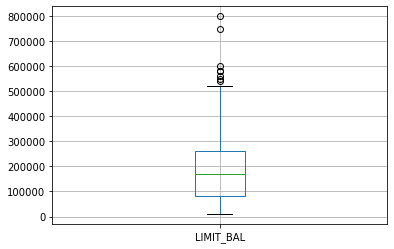

In [14]:
## Data Exploration
data_train.boxplot(column='LIMIT_BAL')
plt.show()


In [15]:
data_train['LIMIT_BAL'].quantile(0.99)

500000.0

In [16]:
data_train.loc[(data_train["LIMIT_BAL"]>500000)] 

,ID,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_HISTORY,BILL_AMT,PAY_AMT,default
1412,1416,510000,FEMALE,1,1,48,-1,9446,8387,0
507,508,510000,MALE,1,1,41,-1,6923,6406,0
1297,1301,600000,FEMALE,3,1,46,-1,19336,17250,0
636,638,750000,FEMALE,3,1,40,-1,25000,35213,0
2979,2989,510000,FEMALE,1,2,40,3,456958,2333,1
239,240,540000,FEMALE,1,2,34,-1,1077,946,0
1518,1522,510000,FEMALE,1,1,37,-1,1212,1338,0
1031,1035,580000,MALE,1,2,31,-1,2986,2866,0
2246,2250,550000,MALE,1,2,31,-1,4582,2567,0
1275,1279,520000,MALE,1,2,39,-1,19802,18907,0


In [17]:
data_train.loc[(data_train["BILL_AMT"]<0)] 

,ID,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_HISTORY,BILL_AMT,PAY_AMT,default
1107,1111,90000,FEMALE,2,1,36,-1,-124,722,0
2455,2459,500000,FEMALE,4,1,39,-1,-11,408,0
409,410,280000,MALE,1,1,44,-1,-2,1276,0
1914,1918,360000,MALE,2,2,37,-1,-235,917,0
290,291,80000,MALE,1,1,45,-1,-25,463,0
2074,2078,240000,MALE,1,1,36,-1,-8,374,0
2337,2341,290000,MALE,1,1,30,-1,-169,413,0
455,456,150000,FEMALE,1,2,42,-1,-41,833,0
43,44,200000,MALE,1,1,36,-1,-4466,28522,0
2334,2338,300000,MALE,2,2,27,-1,-66,83,0


In [18]:
data_train.loc[(data_train["BILL_AMT"]>20000)] 

,ID,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_HISTORY,BILL_AMT,PAY_AMT,default
2157,2161,360000,MALE,2,1,37,-1,101140,17418,0
476,477,30000,MALE,3,1,45,4,28166,1383,1
713,715,190000,MALE,1,1,50,2,72968,2833,1
403,404,100000,FEMALE,3,1,36,2,57795,2883,1
2083,2087,500000,FEMALE,1,2,27,-1,26728,21481,0
...,...,...,...,...,...,...,...,...,...,...
1233,1237,160000,MALE,1,1,41,-1,154465,32438,0
1832,1836,380000,MALE,1,1,36,-1,27448,23249,0
1479,1483,140000,FEMALE,2,2,32,2,86701,4196,1
2972,2982,70000,FEMALE,1,2,34,2,45650,2000,1


In [19]:
data_train['PAY_AMT'].quantile(0.99)

49249.96666999986

In [20]:
data_train.loc[(data_train["PAY_AMT"]>50000)] 

,ID,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_HISTORY,BILL_AMT,PAY_AMT,default
2117,2121,350000,MALE,1,1,62,-1,72310,72179,0
122,123,360000,MALE,6,1,66,-1,54753,75708,0
728,730,500000,FEMALE,1,1,33,-1,373702,385692,0
751,753,360000,MALE,3,1,53,-1,80748,75048,0
2254,2258,270000,MALE,1,1,39,-1,44687,52475,0
100,101,200000,FEMALE,2,1,58,-1,34143,64586,0
666,668,420000,FEMALE,1,2,33,-1,5694,68090,0
1025,1029,430000,MALE,1,1,40,-1,78971,80522,0
2717,2722,320000,FEMALE,1,2,44,-1,61916,78762,0
1235,1239,500000,FEMALE,2,2,43,-1,147987,119072,0


In [21]:
pd.options.display.float_format = '{:.2f}'.format
data_train.groupby(['default', 'GENDER'], as_index=False)['GENDER'].size()/data_train.shape[0]

default  GENDER
0        FEMALE   0.43
         MALE     0.23
1        FEMALE   0.19
         MALE     0.15
dtype: float64

In [22]:
pd.crosstab(data_train.default, data_train.GENDER, margins=True)

GENDER,FEMALE,MALE,All
default,,,
0,1039,558,1597
1,449,347,796
All,1488,905,2393


In [23]:
pd.crosstab(data_train.default, data_train.GENDER, margins=True)/data_train.shape[0]

GENDER,FEMALE,MALE,All
default,,,
0,0.43,0.23,0.67
1,0.19,0.15,0.33
All,0.62,0.38,1.00


In [24]:
pd.crosstab(data_train.default, data_train.EDUCATION, margins=True)/data_train.shape[0]

EDUCATION,0,1,2,3,4,5,6,All
default,,,,,,,,
0,0.00,0.35,0.23,0.08,0.00,0.00,0.00,0.67
1,0.00,0.09,0.18,0.06,0.00,0.00,0.00,0.33
All,0.00,0.44,0.41,0.14,0.00,0.00,0.00,1.00


In [25]:
pd.crosstab(data_train.default, data_train.MARRIAGE, margins=True)/data_train.shape[0]

MARRIAGE,0,1,2,3,All
default,,,,,
0,0.00,0.35,0.31,0.00,0.67
1,0.00,0.17,0.16,0.01,0.33
All,0.00,0.52,0.47,0.01,1.00


In [26]:
pd.crosstab(data_train.default, data_train.PAY_HISTORY, margins=True)

PAY_HISTORY,-2,-1,2,3,4,5,6,7,8,All
default,,,,,,,,,,
0,1,1589,0,0,0,1,0,6,0,1597
1,121,0,555,70,14,6,7,21,2,796
All,122,1589,555,70,14,7,7,27,2,2393


In [27]:
#Continuous Features

In [28]:
data_train.columns

Index(['ID', 'LIMIT_BAL', 'GENDER', 'EDUCATION', 'MARRIAGE', 'AGE',
       'PAY_HISTORY', 'BILL_AMT', 'PAY_AMT', 'default'],
      dtype='object')

In [29]:
#Feature Engineering

In [30]:
def get_limit(x):
      if 0<x<100000:
        return "LOW"
      elif 100000<=x<200000:
        return "MEDIUM"
      else:
            return "HIGH"

In [31]:
data_train['LIMIT']=data_train['LIMIT_BAL'].map(get_limit)

In [32]:
data_train.head()

,ID,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_HISTORY,BILL_AMT,PAY_AMT,default,LIMIT
93,94,50000,MALE,2,1,27.00,-1,1512.33,962.17,0,LOW
904,907,200000,MALE,1,2,27.00,-1,5489.50,6346.67,0,HIGH
599,601,100000,MALE,2,2,25.00,-1,585.67,585.67,0,MEDIUM
213,214,20000,FEMALE,1,2,26.00,-1,269.67,614.50,0,LOW
2157,2161,360000,MALE,2,1,37.00,-1,101140.50,17417.83,0,HIGH


In [33]:
pd.crosstab(data_train.default, data_train.LIMIT, margins=True)

LIMIT,HIGH,LOW,MEDIUM,All
default,,,,
0,908,262,427,1597
1,165,436,195,796
All,1073,698,622,2393


In [34]:
pd.crosstab(data_train.default, data_train.LIMIT, margins=True)/data.shape[0]

LIMIT,HIGH,LOW,MEDIUM,All
default,,,,
0,0.30,0.09,0.14,0.53
1,0.06,0.15,0.07,0.27
All,0.36,0.23,0.21,0.80


In [35]:
#Age

In [36]:
# Replace Missing values 
data_train['AGE']=data_train['AGE'].fillna(data_train['AGE'].mean())
data_train.head()

,ID,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_HISTORY,BILL_AMT,PAY_AMT,default,LIMIT
93,94,50000,MALE,2,1,27.00,-1,1512.33,962.17,0,LOW
904,907,200000,MALE,1,2,27.00,-1,5489.50,6346.67,0,HIGH
599,601,100000,MALE,2,2,25.00,-1,585.67,585.67,0,MEDIUM
213,214,20000,FEMALE,1,2,26.00,-1,269.67,614.50,0,LOW
2157,2161,360000,MALE,2,1,37.00,-1,101140.50,17417.83,0,HIGH


In [38]:
data_train.loc[(data_train["AGE"]>70)] 

,ID,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_HISTORY,BILL_AMT,PAY_AMT,default,LIMIT
252,253,260000,FEMALE,1,2,91.00,-1,1835.33,1987.50,0,HIGH
264,265,330000,FEMALE,1,1,91.00,-1,365.00,8694.00,0,HIGH


In [40]:
avg =data_train['AGE'].mean()

In [41]:
data_train.loc[(data_train["AGE"]>70), 'AGE'] = avg

In [42]:
data_train.AGE.describe()

count   2393.00
mean      36.58
std        9.05
min       21.00
25%       29.00
50%       36.00
75%       42.00
max       69.00
Name: AGE, dtype: float64

In [43]:
def get_age(x):
      if 20<x<29:
        return "lessthan30"
      elif 29<=x<35:
        return "betw29-35"
      elif 35<=x<45:
        return "betw35-45"
      else:
            return "morethan45"

In [44]:
age_bkt=data['AGE'].map(get_age)

In [45]:
pd.crosstab(data_train.default, age_bkt, margins=True)/data.shape[0]

AGE,betw29-35,betw35-45,lessthan30,morethan45,All
default,,,,,
0,0.14,0.20,0.10,0.10,0.53
1,0.06,0.08,0.07,0.06,0.27
All,0.20,0.27,0.17,0.16,0.80


In [46]:
#Bill Amount

In [47]:
def get_billamt(x):
      if x<5000:
        return "LOW"
      elif 5000<=x<20000:
        return "MEDIUM"
      else:
            return "HIGH"

In [48]:
data_train['bill_bkt']=data_train['BILL_AMT'].map(get_billamt)

In [49]:
pd.crosstab(data_train.default, data_train['bill_bkt'], margins=True)

bill_bkt,HIGH,LOW,MEDIUM,All
default,,,,
0,114,1033,450,1597
1,442,196,158,796
All,556,1229,608,2393


In [50]:
# Pay Amount

In [51]:
def get_payamt(x):
      if x<833:
        return "LOW"
      elif 833<=x<5281:
        return "MEDIUM"
      else:
            return "HIGH"

In [52]:
data_train['pay_bkt']=data_train['PAY_AMT'].map(get_payamt)

In [53]:
pd.crosstab(data_train.default, data_train['pay_bkt'], margins=True)

pay_bkt,HIGH,LOW,MEDIUM,All
default,,,,
0,524,365,708,1597
1,75,227,494,796
All,599,592,1202,2393


In [54]:
data_train.head()

,ID,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_HISTORY,BILL_AMT,PAY_AMT,default,LIMIT,bill_bkt,pay_bkt
93,94,50000,MALE,2,1,27.00,-1,1512.33,962.17,0,LOW,LOW,MEDIUM
904,907,200000,MALE,1,2,27.00,-1,5489.50,6346.67,0,HIGH,MEDIUM,HIGH
599,601,100000,MALE,2,2,25.00,-1,585.67,585.67,0,MEDIUM,LOW,LOW
213,214,20000,FEMALE,1,2,26.00,-1,269.67,614.50,0,LOW,LOW,LOW
2157,2161,360000,MALE,2,1,37.00,-1,101140.50,17417.83,0,HIGH,HIGH,HIGH


In [55]:
#Gender

In [56]:
data_train["GENDER"] = data_train["GENDER"].map(lambda x: 1 if x=='MALE' else 0)

In [57]:
data_train.head(6)

,ID,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_HISTORY,BILL_AMT,PAY_AMT,default,LIMIT,bill_bkt,pay_bkt
93,94,50000,1,2,1,27.00,-1,1512.33,962.17,0,LOW,LOW,MEDIUM
904,907,200000,1,1,2,27.00,-1,5489.50,6346.67,0,HIGH,MEDIUM,HIGH
599,601,100000,1,2,2,25.00,-1,585.67,585.67,0,MEDIUM,LOW,LOW
213,214,20000,0,1,2,26.00,-1,269.67,614.50,0,LOW,LOW,LOW
2157,2161,360000,1,2,1,37.00,-1,101140.50,17417.83,0,HIGH,HIGH,HIGH
30,31,210000,0,1,2,31.00,-1,3021.67,3331.50,0,HIGH,LOW,MEDIUM


In [58]:
data_train["GENDER"].value_counts()

0    1488
1     905
Name: GENDER, dtype: int64

In [59]:
#Education

In [60]:
data_train.drop(data_train.query("EDUCATION ==0 | EDUCATION > 3").index, inplace=True)

In [61]:
data_train.EDUCATION.unique()

array([2, 1, 3], dtype=int64)

In [62]:
def get_edu(x):
      if x==1:
        return "GRADUATE"
      elif x==2:
        return "UNIV"
      else:
            return "HIGHSCHOOL"

In [63]:
data_train['EDU']=data_train['EDUCATION'].map(get_edu)

In [64]:
pd.crosstab(data_train.default, data_train.EDU, margins=True)/data_train.shape[0]

EDU,GRADUATE,HIGHSCHOOL,UNIV,All
default,,,,
0,0.35,0.08,0.23,0.66
1,0.09,0.06,0.18,0.34
All,0.44,0.15,0.41,1.00


In [65]:
#MARRIAGE

In [66]:
data_train.drop(data_train.query("MARRIAGE ==0 | MARRIAGE > 2").index, inplace=True)

In [67]:
data_train.MARRIAGE.value_counts()

1    1246
2    1107
Name: MARRIAGE, dtype: int64

In [68]:
data_train["MARRIAGE"] = data_train["MARRIAGE"].map(lambda x: 1 if x==1 else 0)

In [69]:
#Payhist

In [70]:
def get_payhist(x):
      if x==-2:
        return "left"
      elif x==-1:
        return "dulypaid"
      else:
            return "delinquent"

In [72]:
data_train['PAY_HISTORY']=data_train['PAY_HISTORY'].map(get_payhist)

In [73]:
pd.crosstab(data_train.default, data_train.PAY_HISTORY, margins=True)/data.shape[0]

PAY_HISTORY,delinquent,All
default,,
0,0.52,0.52
1,0.26,0.26
All,0.79,0.79


In [74]:
data_train.head()

,ID,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_HISTORY,BILL_AMT,PAY_AMT,default,LIMIT,bill_bkt,pay_bkt,EDU
93,94,50000,1,2,1,27.00,delinquent,1512.33,962.17,0,LOW,LOW,MEDIUM,UNIV
904,907,200000,1,1,0,27.00,delinquent,5489.50,6346.67,0,HIGH,MEDIUM,HIGH,GRADUATE
599,601,100000,1,2,0,25.00,delinquent,585.67,585.67,0,MEDIUM,LOW,LOW,UNIV
213,214,20000,0,1,0,26.00,delinquent,269.67,614.50,0,LOW,LOW,LOW,GRADUATE
2157,2161,360000,1,2,1,37.00,delinquent,101140.50,17417.83,0,HIGH,HIGH,HIGH,UNIV


In [75]:
#OneHotEncoding

In [76]:
data_final = pd.get_dummies(data_train, prefix = ['edu', 'pay_hist','limit', 'bill_bkt','pay_bkt'], columns=['EDU','PAY_HISTORY', 'LIMIT','bill_bkt','pay_bkt'])

In [77]:
data_final.head()

,ID,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,BILL_AMT,PAY_AMT,default,edu_GRADUATE,...,pay_hist_delinquent,limit_HIGH,limit_LOW,limit_MEDIUM,bill_bkt_HIGH,bill_bkt_LOW,bill_bkt_MEDIUM,pay_bkt_HIGH,pay_bkt_LOW,pay_bkt_MEDIUM
93,94,50000,1,2,1,27.00,1512.33,962.17,0,0,...,1,0,1,0,0,1,0,0,0,1
904,907,200000,1,1,0,27.00,5489.50,6346.67,0,1,...,1,1,0,0,0,0,1,1,0,0
599,601,100000,1,2,0,25.00,585.67,585.67,0,0,...,1,0,0,1,0,1,0,0,1,0
213,214,20000,0,1,0,26.00,269.67,614.50,0,1,...,1,0,1,0,0,1,0,0,1,0
2157,2161,360000,1,2,1,37.00,101140.50,17417.83,0,0,...,1,1,0,0,1,0,0,1,0,0


In [78]:
data_final.columns

Index(['ID', 'LIMIT_BAL', 'GENDER', 'EDUCATION', 'MARRIAGE', 'AGE', 'BILL_AMT',
       'PAY_AMT', 'default', 'edu_GRADUATE', 'edu_HIGHSCHOOL', 'edu_UNIV',
       'pay_hist_delinquent', 'limit_HIGH', 'limit_LOW', 'limit_MEDIUM',
       'bill_bkt_HIGH', 'bill_bkt_LOW', 'bill_bkt_MEDIUM', 'pay_bkt_HIGH',
       'pay_bkt_LOW', 'pay_bkt_MEDIUM'],
      dtype='object')

In [79]:
datac = data_train[['LIMIT_BAL','AGE','BILL_AMT','PAY_AMT']]
datac.corr(method='pearson')

,LIMIT_BAL,AGE,BILL_AMT,PAY_AMT
LIMIT_BAL,1.00,0.21,0.03,0.31
AGE,0.21,1.00,0.05,0.07
BILL_AMT,0.03,0.05,1.00,0.26
PAY_AMT,0.31,0.07,0.26,1.00
